# Pokemon CNN

## Preparación de ambiente

### Carga de módulos

In [ ]:
# Data Wrangling
import os
import numpy as np
import pandas as pd
from glob import glob
from PIL import Image
from shutil import copy
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

# Modeling
import tensorflow as tf
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# Data Visualization
import cufflinks as cf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Environment setup
cf.set_config_file(offline=True, theme="solar")

2023-08-17 18:17:52.777624: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-17 18:17:52.921526: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-17 18:17:53.350304: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


### Funciones auxiliares

In [ ]:
def png_to_jpg(file_path, target_path):
    img = Image.open(file_path)
    img = img.convert("RGB")
    img.save(target_path)

## Data Wrangling

### Rutas

In [ ]:
base_dir = "./pokemon/"

In [ ]:
df = pd.read_csv(os.path.join(base_dir, "pokemon.csv"))

In [ ]:
df

,Name,Type1,Type2
0,bulbasaur,Grass,Poison
1,ivysaur,Grass,Poison
2,venusaur,Grass,Poison
3,charmander,Fire,NaN
4,charmeleon,Fire,NaN
...,...,...,...
804,stakataka,Rock,Steel
805,blacephalon,Fire,Ghost
806,zeraora,Electric,NaN
807,meltan,Steel,NaN


In [ ]:
df["Type2"].mode()[0]

'Flying'

In [ ]:
df.isna().mean()

Name     0.000000
Type1    0.000000
Type2    0.499382
dtype: float64

In [ ]:
img_dir = os.path.join(base_dir, "images/")

In [ ]:
ls_images = [x for x in os.listdir(img_dir) if "." in x]

In [ ]:
ls_images

['dratini.png',
 'hakamo-o.jpg',
 'walrein.png',
 'volcarona.png',
 'lopunny.png',
 'simisear.png',
 'foongus.png',
 'guzzlord.jpg',
 'koffing.png',
 'crabominable.jpg',
 'zigzagoon.png',
 'swellow.png',
 'chatot.png',
 'pignite.png',
 'chandelure.png',
 'bruxish.jpg',
 'wimpod.jpg',
 'garbodor.png',
 'ludicolo.png',
 'magearna.jpg',
 'tynamo.png',
 'lucario.png',
 'grovyle.png',
 'psyduck.png',
 'bounsweet.jpg',
 'granbull.png',
 'goodra.png',
 'spheal.png',
 'deino.png',
 'masquerain.png',
 'shelmet.png',
 'prinplup.png',
 'swampert.png',
 'marill.png',
 'pupitar.png',
 'gyarados.png',
 'floatzel.png',
 'jellicent.png',
 'misdreavus.png',
 'sharpedo.png',
 'sliggoo.png',
 'suicune.png',
 'delcatty.png',
 'karrablast.png',
 'slowpoke.png',
 'lillipup.png',
 'qwilfish.png',
 'aipom.png',
 'florges.png',
 'krokorok.png',
 'jirachi.png',
 'shiinotic.jpg',
 'honchkrow.png',
 'flygon.png',
 'pyukumuku.jpg',
 'archeops.png',
 'rhyhorn.png',
 'heracross.png',
 'claydol.png',
 'kabuto.png',
 

In [ ]:
len(ls_images)

809

### Extensiones de archivos

In [ ]:
ls_ext = [x.split(".")[-1] for x in ls_images]

In [ ]:
set(ls_ext)

{'jpg', 'png'}

In [ ]:
ls_images

['dratini.png',
 'hakamo-o.jpg',
 'walrein.png',
 'volcarona.png',
 'lopunny.png',
 'simisear.png',
 'foongus.png',
 'guzzlord.jpg',
 'koffing.png',
 'crabominable.jpg',
 'zigzagoon.png',
 'swellow.png',
 'chatot.png',
 'pignite.png',
 'chandelure.png',
 'bruxish.jpg',
 'wimpod.jpg',
 'garbodor.png',
 'ludicolo.png',
 'magearna.jpg',
 'tynamo.png',
 'lucario.png',
 'grovyle.png',
 'psyduck.png',
 'bounsweet.jpg',
 'granbull.png',
 'goodra.png',
 'spheal.png',
 'deino.png',
 'masquerain.png',
 'shelmet.png',
 'prinplup.png',
 'swampert.png',
 'marill.png',
 'pupitar.png',
 'gyarados.png',
 'floatzel.png',
 'jellicent.png',
 'misdreavus.png',
 'sharpedo.png',
 'sliggoo.png',
 'suicune.png',
 'delcatty.png',
 'karrablast.png',
 'slowpoke.png',
 'lillipup.png',
 'qwilfish.png',
 'aipom.png',
 'florges.png',
 'krokorok.png',
 'jirachi.png',
 'shiinotic.jpg',
 'honchkrow.png',
 'flygon.png',
 'pyukumuku.jpg',
 'archeops.png',
 'rhyhorn.png',
 'heracross.png',
 'claydol.png',
 'kabuto.png',
 

In [ ]:
len([x for x in ls_ext if "jpg" in x]), len([x for x in ls_ext if "png" in x])

(88, 721)

In [ ]:
ls_images

['dratini.png',
 'hakamo-o.jpg',
 'walrein.png',
 'volcarona.png',
 'lopunny.png',
 'simisear.png',
 'foongus.png',
 'guzzlord.jpg',
 'koffing.png',
 'crabominable.jpg',
 'zigzagoon.png',
 'swellow.png',
 'chatot.png',
 'pignite.png',
 'chandelure.png',
 'bruxish.jpg',
 'wimpod.jpg',
 'garbodor.png',
 'ludicolo.png',
 'magearna.jpg',
 'tynamo.png',
 'lucario.png',
 'grovyle.png',
 'psyduck.png',
 'bounsweet.jpg',
 'granbull.png',
 'goodra.png',
 'spheal.png',
 'deino.png',
 'masquerain.png',
 'shelmet.png',
 'prinplup.png',
 'swampert.png',
 'marill.png',
 'pupitar.png',
 'gyarados.png',
 'floatzel.png',
 'jellicent.png',
 'misdreavus.png',
 'sharpedo.png',
 'sliggoo.png',
 'suicune.png',
 'delcatty.png',
 'karrablast.png',
 'slowpoke.png',
 'lillipup.png',
 'qwilfish.png',
 'aipom.png',
 'florges.png',
 'krokorok.png',
 'jirachi.png',
 'shiinotic.jpg',
 'honchkrow.png',
 'flygon.png',
 'pyukumuku.jpg',
 'archeops.png',
 'rhyhorn.png',
 'heracross.png',
 'claydol.png',
 'kabuto.png',
 

### Cambio de formato

In [ ]:
jpg_path = os.path.join(img_dir, "jpg/")
if not os.path.exists(jpg_path):
    os.makedirs(jpg_path)
for img in ls_images:
    png_to_jpg(os.path.join(img_dir, img), os.path.join(jpg_path, ".".join(img.split(".")[:-1])+".jpg"))

/home/oscar/virtualenvs/diplo/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning:

Palette images with Transparency expressed in bytes should be converted to RGBA images



### Validación de datos

In [ ]:
ls_names = [".".join(x.split(".")[:-1]) for x in ls_images]

In [ ]:
df

,Name,Type1,Type2
0,bulbasaur,Grass,Poison
1,ivysaur,Grass,Poison
2,venusaur,Grass,Poison
3,charmander,Fire,NaN
4,charmeleon,Fire,NaN
...,...,...,...
804,stakataka,Rock,Steel
805,blacephalon,Fire,Ghost
806,zeraora,Electric,NaN
807,meltan,Steel,NaN


In [ ]:
df["Name"].map(lambda x: x in ls_names)

0      True
1      True
2      True
3      True
4      True
       ... 
804    True
805    True
806    True
807    True
808    True
Name: Name, Length: 809, dtype: bool

In [ ]:
df["Name"].map(lambda x: x in ls_names).mean()

1.0

### Ordenamiento de archivos

In [ ]:
train_path = os.path.join(img_dir, "train")
test_path = os.path.join(img_dir, "test")
for index, row in df.iterrows():
    final_path = train_path if np.random.random() <= 0.7 else test_path
    final_path = os.path.join(final_path, row["Type1"])
    if not os.path.exists(final_path):
        os.makedirs(final_path)
    source = os.path.join(jpg_path, row["Name"]+".jpg")
    destination = os.path.join(final_path, row["Name"]+".jpg")
    copy(source, destination)

In [ ]:
train_path = os.path.join(img_dir, "train")
test_path = os.path.join(img_dir, "test")
for index, row in df.iterrows():
    final_path = train_path if np.random.random() <= 0.7 else test_path
    if pd.isna(row["Type2"]):
        continue
    final_path = os.path.join(final_path, row["Type2"])
    if not os.path.exists(final_path):
        os.makedirs(final_path)
    source = os.path.join(jpg_path, row["Name"]+".jpg")
    destination = os.path.join(final_path, row["Name"]+".jpg")
    copy(source, destination)

### Exploratory Data Analysis

In [ ]:
ls_pkmn = []
for folder in os.listdir(train_path):
    full_path = os.path.join(train_path, folder)
    pkmn = os.listdir(full_path)[-1]
    ls_pkmn.append(os.path.join(full_path, pkmn))
for folder in os.listdir(test_path):
    full_path = os.path.join(test_path, folder)
    pkmn = os.listdir(full_path)[-1]
    ls_pkmn.append(os.path.join(full_path, pkmn))

In [ ]:
len(ls_pkmn)

36

<Figure size 3600x3600 with 0 Axes>

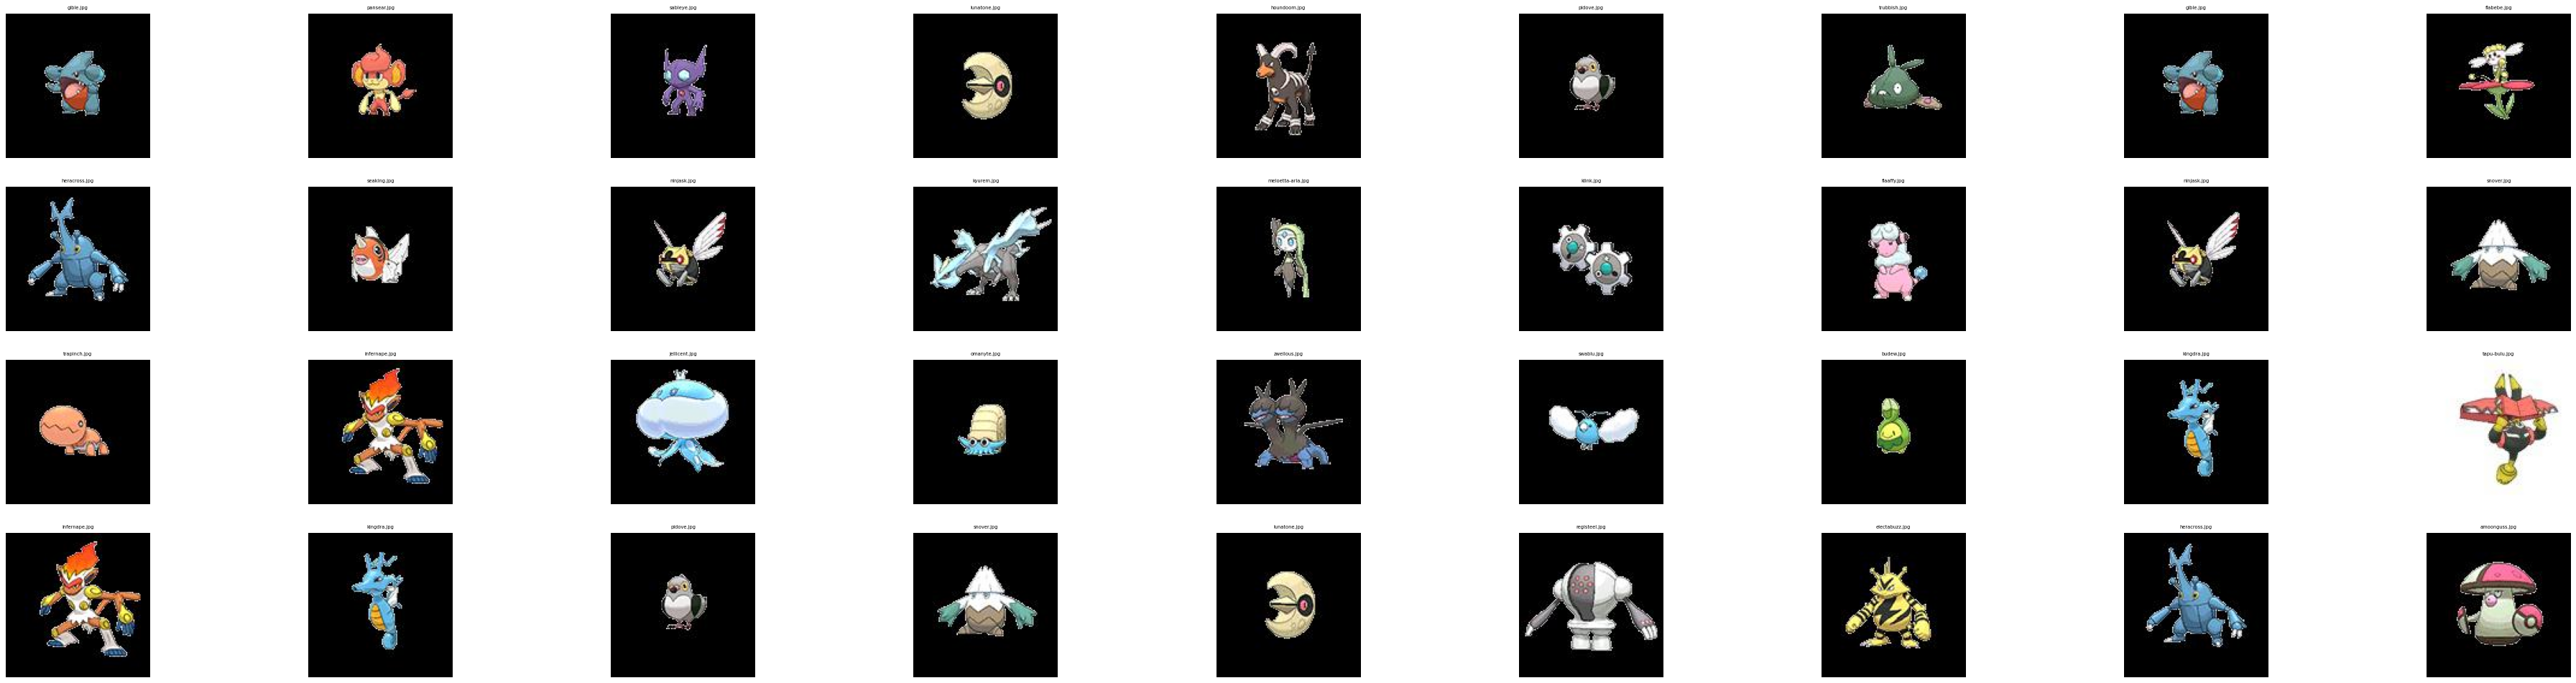

In [ ]:
ROWS = 4
COLS = 9
fig = plt.gcf()
fig.set_size_inches(36, 36)
plt.figure(figsize=(60, 15), dpi=80)
for i, img_path in enumerate(ls_pkmn):
    data = img_path.split('/')[-1]
    sp = plt.subplot(ROWS, COLS, i+1)
    sp.axis('Off')
    img = mpimg.imread(img_path)
    sp.set_title(data, fontsize=6)
    plt.imshow(img, cmap='gray')
plt.show()

### Generadores

In [ ]:
dgen_train = ImageDataGenerator(rescale=1./255,
                                validation_split=0.2,
                                zoom_range=0.1)

In [ ]:
dgen_validation = ImageDataGenerator(rescale=1./255)

In [ ]:
dgen_test = ImageDataGenerator(rescale=1./255)

In [ ]:
TARGET_SIZE = (120, 120)
BATCH_SIZE = 32
CLASS_MODE = 'categorical'

In [ ]:
dgen_train.flow_from_directory?

Signature:
dgen_train.flow_from_directory(
    directory,
    target_size=(256, 256),
    color_mode='rgb',
    classes=None,
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=None,
    save_to_dir=None,
    save_prefix='',
    save_format='png',
    follow_links=False,
    subset=None,
    interpolation='nearest',
    keep_aspect_ratio=False,
)
Docstring:
Takes the path to a directory & generates batches of augmented data.

Args:
    directory: string, path to the target directory. It should contain
      one subdirectory per class. Any PNG, JPG, BMP, PPM or TIF images
      inside each of the subdirectories directory tree will be included
      in the generator. See [this script](
      https://gist.github.com/fchollet/0830affa1f7f19fd47b06d4cf89ed44d)
      for more details.
    target_size: Tuple of integers `(height, width)`, defaults to `(256,
      256)`. The dimensions to which all images found will be resized.
    color_mode: One of "grayscale", "rgb"

In [ ]:
train_generator = dgen_train.flow_from_directory(train_path,
                                                 target_size=TARGET_SIZE,
                                                 subset='training',
                                                 batch_size=BATCH_SIZE,
                                                 class_mode=CLASS_MODE)

Found 679 images belonging to 18 classes.


In [ ]:
validation_generator = dgen_train.flow_from_directory(train_path,
                                                      target_size=TARGET_SIZE,
                                                      subset='validation',
                                                      batch_size=BATCH_SIZE,
                                                      class_mode=CLASS_MODE)

Found 159 images belonging to 18 classes.


In [ ]:
test_generator = dgen_test.flow_from_directory(test_path,
                                               target_size=TARGET_SIZE,
                                               batch_size=BATCH_SIZE,
                                               class_mode=CLASS_MODE)

Found 376 images belonging to 18 classes.


In [ ]:
train_generator.class_indices

{'Bug': 0,
 'Dark': 1,
 'Dragon': 2,
 'Electric': 3,
 'Fairy': 4,
 'Fighting': 5,
 'Fire': 6,
 'Flying': 7,
 'Ghost': 8,
 'Grass': 9,
 'Ground': 10,
 'Ice': 11,
 'Normal': 12,
 'Poison': 13,
 'Psychic': 14,
 'Rock': 15,
 'Steel': 16,
 'Water': 17}

In [ ]:
train_generator.image_shape

(120, 120, 3)

## Modelado

### Baseline

In [ ]:
model = Sequential()

2023-08-17 18:48:03.728658: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


### Capas convolucionales

In [ ]:
model.add(Conv2D(16, (3, 3), padding='same', activation='relu',
                input_shape=train_generator.image_shape))
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.add(Dropout(0.2))

In [ ]:
model.add(Conv2D(32, (5,5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

In [ ]:
MaxPooling2D?

Init signature:
MaxPooling2D(
    pool_size=(2, 2),
    strides=None,
    padding='valid',
    data_format=None,
    **kwargs,
)
Docstring:     
Max pooling operation for 2D spatial data.

Downsamples the input along its spatial dimensions (height and width)
by taking the maximum value over an input window
(of size defined by `pool_size`) for each channel of the input.
The window is shifted by `strides` along each dimension.

The resulting output,
when using the `"valid"` padding option, has a spatial shape
(number of rows or columns) of:
`output_shape = math.floor((input_shape - pool_size) / strides) + 1`
(when `input_shape >= pool_size`)

The resulting output shape when using the `"same"` padding option is:
`output_shape = math.floor((input_shape - 1) / strides) + 1`

For example, for `strides=(1, 1)` and `padding="valid"`:

>>> x = tf.constant([[1., 2., 3.],
...                  [4., 5., 6.],
...                  [7., 8., 9.]])
>>> x = tf.reshape(x, [1, 3, 3, 1])
>>> max_pool_2d = t

### Red densamente conectada

In [ ]:
len(train_generator.class_indices)

18

In [ ]:
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(len(train_generator.class_indices), activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 120, 120, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 60, 60, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 60, 60, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 32)        12832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 30, 30, 32)        0

### Configuración de entrenamiento

In [ ]:
model.compile(Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

### Callbacks

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=15)

In [ ]:
checkpoint = tf.keras.callbacks.ModelCheckpoint('models/pkmn/model_{val_accuracy:.3f}.h5',
                               save_best_only=True,
                               save_weights_only=False,
                               monitor='val_accuracy')

### Entrenamiento del modelo

In [ ]:
history = model.fit(train_generator,
          epochs=50,
          validation_data=validation_generator,
          callbacks=[early_stopping, checkpoint])

Epoch 1/50


2023-08-17 18:51:31.901252: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


21/22 [===========================>..] - ETA: 0s - loss: 3.0023 - accuracy: 0.0896

2023-08-17 18:51:33.022828: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


22/22 [==============================] - 1s 52ms/step - loss: 2.9911 - accuracy: 0.0943 - val_loss: 2.8086 - val_accuracy: 0.1006
Epoch 2/50
22/22 [==============================] - 1s 49ms/step - loss: 2.7637 - accuracy: 0.1384 - val_loss: 2.7782 - val_accuracy: 0.1635
Epoch 3/50
22/22 [==============================] - 1s 47ms/step - loss: 2.6383 - accuracy: 0.1738 - val_loss: 2.7203 - val_accuracy: 0.1761
Epoch 4/50
22/22 [==============================] - 1s 46ms/step - loss: 2.4416 - accuracy: 0.2224 - val_loss: 2.7580 - val_accuracy: 0.1635
Epoch 5/50
22/22 [==============================] - 1s 47ms/step - loss: 2.1562 - accuracy: 0.3270 - val_loss: 2.8643 - val_accuracy: 0.1321
Epoch 6/50
22/22 [==============================] - 1s 47ms/step - loss: 1.8988 - accuracy: 0.3800 - val_loss: 3.1051 - val_accuracy: 0.1321
Epoch 7/50
22/22 [==============================] - 1s 46ms/step - loss: 1.7233 - accuracy: 0.4507 - val_loss: 3.4291 - val_accuracy: 0.1195
Epoch 8/50
22/22 [======

### Análisis de resultados

In [ ]:
results = pd.DataFrame(history.history)

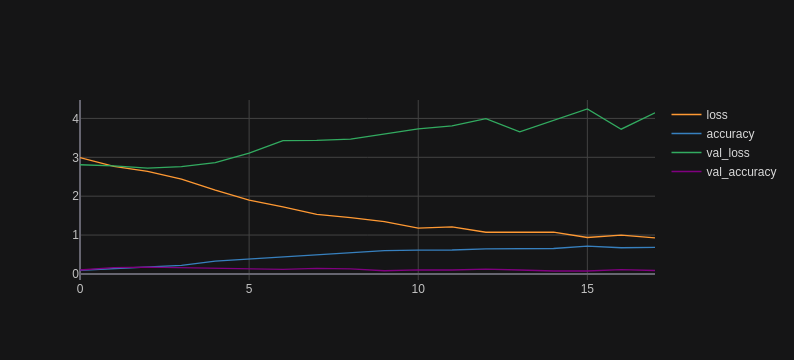

In [ ]:
results.iplot()

### Selección de mejor modelo

In [ ]:
[x.split(".")[-2] for x in os.listdir("./models/pkmn")]

['176', '164', '101']

In [ ]:
max_acc = max([x.split(".")[-2] for x in os.listdir("./models/pkmn")])

In [ ]:
max_acc

'176'

## Predicción

### Lectura de mejor modelo

In [ ]:
model = tf.keras.models.load_model(f'./models/pkmn/model_0.{max_acc}.h5')

### Predicción de conjunto de validación

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print('Test loss: {} Test Acc: {}'.format(test_loss, test_acc))

12/12 [==============================] - 0s 7ms/step - loss: 2.9395 - accuracy: 0.1144
Test loss: 2.939471960067749 Test Acc: 0.1143617033958435


2023-08-17 18:54:39.374762: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


### Predicción de una nueva imagen

In [ ]:
def predict_type(file_path, model, predict_map):
    test_image = load_img(file_path, target_size=(120,120))
    img = img_to_array(test_image)
    img = np.expand_dims(img, axis=0)
    prediction = model.predict(img)
    prediction = np.argmax(prediction)
    return predict_map[prediction]

In [ ]:
test_path+"/**/*.jpg"

'./pokemon/images/test/**/*.jpg'

In [ ]:
glob(test_path+"/**/*.jpg")

['./pokemon/images/test/Ground/cubone.jpg',
 './pokemon/images/test/Ground/marowak.jpg',
 './pokemon/images/test/Ground/drilbur.jpg',
 './pokemon/images/test/Ground/baltoy.jpg',
 './pokemon/images/test/Ground/quagsire.jpg',
 './pokemon/images/test/Ground/steelix.jpg',
 './pokemon/images/test/Ground/golett.jpg',
 './pokemon/images/test/Ground/nincada.jpg',
 './pokemon/images/test/Ground/gabite.jpg',
 './pokemon/images/test/Ground/swinub.jpg',
 './pokemon/images/test/Ground/numel.jpg',
 './pokemon/images/test/Ground/geodude.jpg',
 './pokemon/images/test/Ground/sandile.jpg',
 './pokemon/images/test/Ground/gliscor.jpg',
 './pokemon/images/test/Ground/camerupt.jpg',
 './pokemon/images/test/Ground/claydol.jpg',
 './pokemon/images/test/Ground/marshtomp.jpg',
 './pokemon/images/test/Ground/mudbray.jpg',
 './pokemon/images/test/Ground/hippowdon.jpg',
 './pokemon/images/test/Ground/torterra.jpg',
 './pokemon/images/test/Ground/gastrodon.jpg',
 './pokemon/images/test/Ground/excadrill.jpg',
 './po

In [ ]:
test = np.random.choice(glob(test_path+"/**/*.jpg"))

In [ ]:
test

'./pokemon/images/test/Poison/victreebel.jpg'

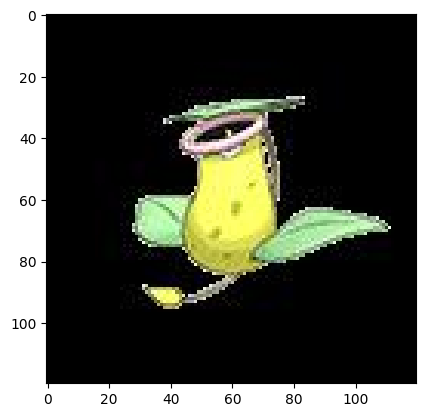

In [ ]:
img = mpimg.imread(test)
plt.imshow(img, cmap='gray')

In [ ]:
train_generator.class_indices.items()

dict_items([('Bug', 0), ('Dark', 1), ('Dragon', 2), ('Electric', 3), ('Fairy', 4), ('Fighting', 5), ('Fire', 6), ('Flying', 7), ('Ghost', 8), ('Grass', 9), ('Ground', 10), ('Ice', 11), ('Normal', 12), ('Poison', 13), ('Psychic', 14), ('Rock', 15), ('Steel', 16), ('Water', 17)])

In [ ]:
classes = {value: key for key, value in train_generator.class_indices.items()}

In [ ]:
train_generator.class_indices

{'Bug': 0,
 'Dark': 1,
 'Dragon': 2,
 'Electric': 3,
 'Fairy': 4,
 'Fighting': 5,
 'Fire': 6,
 'Flying': 7,
 'Ghost': 8,
 'Grass': 9,
 'Ground': 10,
 'Ice': 11,
 'Normal': 12,
 'Poison': 13,
 'Psychic': 14,
 'Rock': 15,
 'Steel': 16,
 'Water': 17}

In [ ]:
classes

{0: 'Bug',
 1: 'Dark',
 2: 'Dragon',
 3: 'Electric',
 4: 'Fairy',
 5: 'Fighting',
 6: 'Fire',
 7: 'Flying',
 8: 'Ghost',
 9: 'Grass',
 10: 'Ground',
 11: 'Ice',
 12: 'Normal',
 13: 'Poison',
 14: 'Psychic',
 15: 'Rock',
 16: 'Steel',
 17: 'Water'}

In [ ]:
predict_type(test, model, classes)

1/1 [==============================] - 0s 41ms/step


'Grass'

In [ ]:
df[df["Name"].str.contains("vict")]

,Name,Type1,Type2
70,victreebel,Grass,Poison
493,victini,Psychic,Fire


In [ ]:
df[["Type1", "Type2"]].drop_duplicates()

,Type1,Type2
0,Grass,Poison
3,Fire,NaN
5,Fire,Flying
6,Water,NaN
9,Bug,NaN
...,...,...
782,Dragon,Fighting
790,Psychic,Steel
792,Rock,Poison
801,Fighting,Ghost
